Correlations of  Beachwatch stations with Weather and River Flow

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')

In [2]:
bw_pkg =  mp.open_package('http://library.metatab.org/ceden.waterboards.ca.gov-beachwatch-sandiego-2.zip')
env_pkg =  mp.open_package('http://library.metatab.org/sandiegodata.org-water_quality-3.zip')

In [3]:
env_pkg

In [4]:
bw_pkg

In [111]:
env = env_pkg.resource('tides_river_rain').read_csv(parse_dates=True)
bw = bw_pkg.resource('beachwatch-sd').read_csv(parse_dates=True)

In [241]:
bw['log_result'] = bw.result.apply(np.log10)
# It looks like the prefix of the station code groups stations, maybe into watersheds. 
bw['stationgroup'] = bw.stationcode.str[:2]

bw = bw[(bw.analyte == 'Coliform, Total') & (bw.unit=='MPN/100 mL')]

In [242]:

bw.methodname.value_counts() # Does selecting on this matter?

SM 9221 B      23592
MTF            19352
Colilert-18     4474
SM 9222 B         93
SM 9221 E          4
Name: methodname, dtype: int64

In [232]:
bw.groupby('stationcode').result.count().sort_values(ascending=False).head()

stationcode
EH-420    1259
SE-060    1212
OC-100    1150
FM-010    1013
IB-080    1008
Name: result, dtype: int64

In [222]:
sg = bw[bw.stationgroup=='PL'][['stationcode','sampledate','result']]

In [240]:
_ = bw[['stationcode','sampledate','result']].groupby(['stationcode', 'sampledate']).mean().unstack(0)
#_.columns  = _.columns.get_level_values(1)
_.notnull().sum().sort_values(ascending=False).head()
#_.head()

        stationcode
result  OC-100         1055
        IB-080         1002
        SE-060          956
        FM-010          940
        EH-060          931
dtype: int64

stationcode,PL-010,PL-040,PL-050,PL-070,PL-080,PL-090,PL-100,PL-110,PL-120
sampledate,,,,,,,,,
2013-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


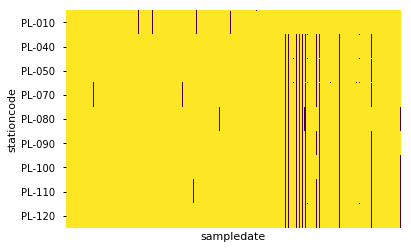

In [210]:
_ = sg.groupby(['stationcode', 'sampledate']).mean().unstack(0)
_.columns  = _.columns.get_level_values(1)
#_ = np.log(_)
#_ = _.resample('1d').first()

_ = _.resample('1d').mean() #.interpolate()
#_ = np.log(_)

sns.heatmap(_.isnull().T,cbar=False,xticklabels=False,cmap = 'viridis')
_.tail(20)

In [237]:
bw[bw.stationcode=='SE-060'].result.isnull().sum()

1

In [218]:
_.notnull().sum()

stationcode
PL-010    105
PL-040    180
PL-050    183
PL-070    188
PL-080    205
PL-090    192
PL-100    199
PL-110    202
PL-120    189
dtype: int64

In [ ]:
bw_uns = _
bw_uns_m = bw_uns.resample('1d').first()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


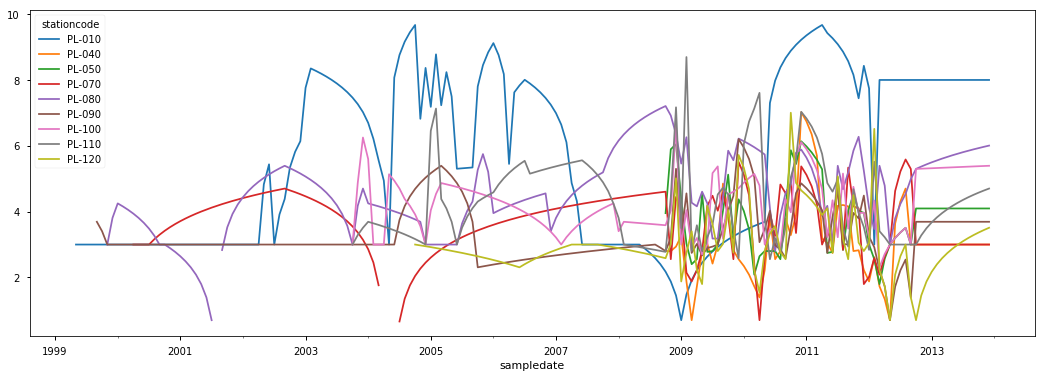

In [101]:
a = env.set_index('date')
b = np.log(bw_uns_w.reset_index().set_index('sampledate'))

cor = b.join(a)

fig, ax = plt.subplots(1,figsize=(18,6))
b.plot(ax=ax)

In [97]:
cor.corrwith(cor.dailyprecip).sort_values(ascending=False).head(20)

dailyprecip       1.000000
discharge_rate    0.843256
PL-090            0.266284
PL-120            0.220572
PL-110            0.218165
wl_max            0.167807
PL-070            0.131949
PL-080            0.100727
PL-100            0.083253
PL-050            0.018391
PL-040           -0.089208
PL-010           -0.104044
wl_min           -0.235371
dtype: float64

In [98]:
bw[bw.stationcode == 'PL-040'].set_index('sampledate').resample('1d').mean().log_result.to_frame().corrwith(a.discharge_rate)

log_result    0.320235
dtype: float64

In [99]:
bw[bw.stationcode == 'PL-040'].set_index('sampledate').resample('1d').mean().log_result.to_frame().corrwith(a.wl_max)

log_result    0.350296
dtype: float64

In [100]:
bw[bw.stationcode == 'PL-040'].set_index('sampledate').resample('1d').mean().log_result.to_frame().corrwith(a.dailyprecip)

log_result    0.290327
dtype: float64